<a href="https://colab.research.google.com/github/mlchpolina/for-analysts/blob/main/%D0%BB%D0%B0%D0%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import pandas as pd
import numpy as np

In [30]:
from google.colab import files
uploaded = files.upload()

Saving dataset7 (1).csv to dataset7 (1) (5).csv


In [31]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
series = read_csv('dataset7 (1).csv', header = 0, index_col = 0)
series.head()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [32]:
type(series)

pandas.core.frame.DataFrame

In [33]:
values = series.values
values = values.reshape(len(values), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 0.000000, Max: 26.300000


In [34]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


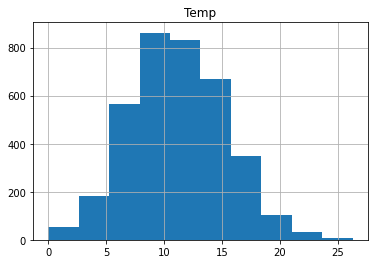

In [35]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset7 (1).csv', header = 0, index_col = 0)
series.hist()
pyplot.show()

In [36]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt

series = read_csv('dataset7 (1).csv', header = 0, index_col = 0)
print(series.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [37]:

values = series.values
values = values.reshape(len(values), 1)

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 11.177753, StandardDeviation: 4.071279


In [38]:

normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[2.33888328]
[1.65113873]
[1.87219948]
[0.84058266]
[1.13533032]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


#Индивидуальное задание

In [39]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url='http://pogoda-service.ru/archive_gsod_res.php?country=AU&station=111570&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,1.0,-4.9,-1.5,NaN,5,0.0,-6.7
1,02.12.2010,0.0,-5.4,-2.1,NaN,2,1.0,-5.2
2,03.12.2010,-2.3,-7.4,-4.1,NaN,1,5.0,-6.7
3,04.12.2010,-1.8,-8.0,-4.6,NaN,0,0.0,-6.7
4,05.12.2010,-5.7,-14.2,-8.9,NaN,1,0.0,-12.0
...,...,...,...,...,...,...,...,...
995,22.08.2013,24.0,6.5,16.5,NaN,2,0.0,15.9
996,23.08.2013,23.7,8.2,17.1,NaN,2,NaN,16.7
997,24.08.2013,21.5,12.7,16.8,NaN,3,9.0,15.8
998,25.08.2013,15.2,11.9,14.0,NaN,2,20.0,13.5


In [40]:
df.drop(df.columns[[1,2,4,5,6,7]], axis = 1, inplace = True)
df

,ÐÐ°ÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,-1.5
1,02.12.2010,-2.1
2,03.12.2010,-4.1
3,04.12.2010,-4.6
4,05.12.2010,-8.9
...,...,...
995,22.08.2013,16.5
996,23.08.2013,17.1
997,24.08.2013,16.8
998,25.08.2013,14.0


In [41]:
df.columns = ['Date', 'Mean_temp']

In [42]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1000 non-null   object 
 1   Mean_temp  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [43]:
df['Date']=df['Date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1000 non-null   datetime64[ns]
 1   Mean_temp  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [44]:
df.isna().sum()

Date         0
Mean_temp    0
dtype: int64

In [45]:

df.set_index('Date', inplace=True)
df.head()

,Mean_temp
Date,
2010-01-12,-1.5
2010-02-12,-2.1
2010-03-12,-4.1
2010-04-12,-4.6
2010-05-12,-8.9


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
values = df.values
values = values.reshape(len(values), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: -15.300000, Max: 26.100000


[0.33333333]
[0.31884058]
[0.2705314]
[0.25845411]
[0.15458937]
[-1.5]
[-2.1]
[-4.1]
[-4.6]
[-8.9]


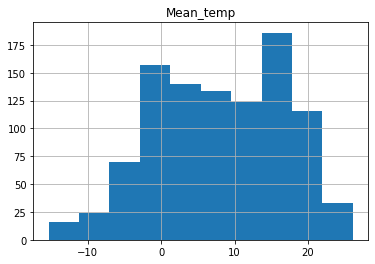

In [48]:

normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])
from matplotlib import pyplot
df.hist()
pyplot.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

values = df.values
values = values.reshape(len(values), 1)

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

Mean: 8.129500, StandardDeviation: 8.846149
[-1.08855272]
[-1.15637884]
[-1.38246591]
[-1.43898767]
[-1.92507487]
[-1.5]
[-2.1]
[-4.1]
[-4.6]
[-8.9]
